# Régime transitoire d'un oscillateur à pont de Wien

## Consignes :

En complétant et en modifiant si besoin le code ci-dessous, vous devez répondre aux questions suivantes :

1. Mettez en évidence l'existence d'une valeur critique de $A$ au delà de laquelle les oscillations démarrent spontanément.
2. Tracez le portrait de phase de l'oscillateur de Wien pour cette valeur critique de $A$.

Vous n'avez pas besoin de modifier certaines cellules, qui commencent par la ligne :

`# Pas besoin de modifier cette cellule`


Pour éditer une cellule, cliquez dessus. Pour l'exécuter, appuyez sur Maj+Entrée (Entrée crée une nouvelle ligne).

Il faut bien entendu exécuter toutes les cellules pour que le programme fonctionne, y compris celles qui ne sont pas à modifier.


## Le code à utiliser :

### Chargement des librairies nécessaires :

In [1]:
# Pas besoin de modifier cette cellule
%matplotlib inline
from scipy.integrate import odeint
import numpy as np
import pylab as plt

### Définition des constantes :

In [2]:
# Valeur des composants
R = 10e3 #  ohm
C = 100e-9 #  farad

t0  = 0 # s
tmax = 0.1 # s
npoints = 1000


omega0 = 1/(R*C)
A = 3

ci = [1,0] # Les conditions initiales

### Résolution de l'équation différentielle :

L'équation différentielle à résoudre est :
$$\ddot s + \omega_0 (3-A) \dot s + \omega_0^2 s = 0$$

Pour résoudre cette équation avec python, on se ramène à une équation différentielle d'ordre 1 sur le vecteur :
$$S = \left( \begin{array}{c}
s \\
\dot s
\end{array} \right)
$$

En effet, on remarque que l'on peut écrire :
$$\dot S = 
\left( \begin{array}{c}
\dot s \\
\ddot s \end{array} \right) =
\left( \begin{array}{c}
\dot s \\
-\omega_0 (3-A) \dot s - \omega_0^2 s
\end{array} \right) 
$$

En introduisant $f(S) = \left( \begin{array}{c}
\dot s \\
-\omega_0 (3-A) \dot s - \omega_0^2 s
\end{array} \right) $, on peut ainsi écrire l'équation différentielle sous la forme :
$$\dot S = f(S), $$
équation différentielle d'ordre 1 portant sur le vecteur $S$ qui peut être résolue à l'aide du module `odeint`
de scipy.

### Définition de la fonction $f(S)$ :

In [3]:
# Pas besoin de modifier ce bloc

def f(S, t):
    """La fonction f caractéristique de l'équation différentielle.
    Cette fonction dépend du temps uniquement pour pouvoir l'utiliser avec odeint.
    """
    s, sp = S # On récupère les valeurs de s et de sa dérivée
    return sp, -omega0 * (3-A) * sp - omega0**2 * s # on retourne les valeurs correspondant à l'équation différentielle

### Résolution pour différentes valeurs de A :

Pour $A = 2,9$, on observe une décroissance exponentielles des oscillations.

Pour $A = 3,1$, on observe une croissance exponentielle des oscillations.

Pour $A = 3$, on observe des oscillations harmoniques.

La valeur critique de $A$ qui permet de le démarrage des oscillations est $A = 3$. 

Si $A >3$, on observe en pratique des oscilations d'amplitude finie, car les non linéarités de l'amplificateur donnent lieu à une saturation des oscillations.

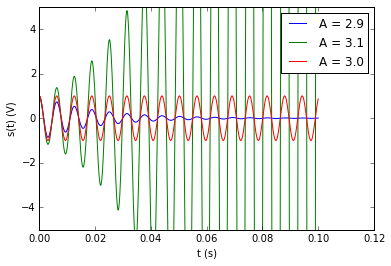

In [4]:
lA = [2.9, 3.1, 3]
t = np.linspace(t0, tmax, npoints)

for A in lA:
    solution = odeint(f, ci, t)
    s = solution[:,0]
    sp = solution[:,1]
    plt.plot(t, s, label='A = %.1f'%A)
    
plt.ylim([-5,5])
plt.legend()

plt.xlabel("t (s)")
plt.ylabel("s(t) (V)")

### Portraits de phase :

On reprend le même code, en traçant cette fois-ci $\dot s$ en fonction de $s$. On reconnaît pour $A = 3$ une trajectoire de phase elliptique, caractéristique d'un oscillateur harmonique.

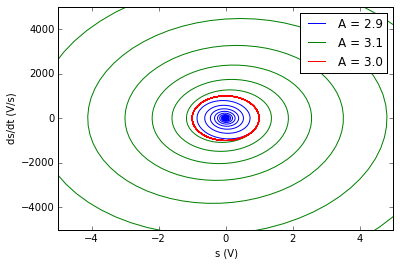

In [5]:
lA = [2.9, 3.1, 3]
t = np.linspace(t0, tmax, npoints)

for A in lA:
    solution = odeint(f, ci, t)
    s = solution[:,0]
    sp = solution[:,1]
    plt.plot(s, sp, label='A = %.1f'%A)
    
plt.xlim([-5,5])
plt.ylim([-5e3,5e3])
plt.legend()

plt.xlabel("s (V)")
plt.ylabel("ds/dt (V/s)")
